# Modelos lineales generalizados

Los modelos lineales del módulo anterior funcionaban bajo la suposición de una distribución Gaussiana sobre la variable de resultados. Luego, reemplazábamos el parámetro de la media de la distribución, $\mu$, con un modelo lineal. Este tipo de modelos tienen la forma:

$$
\begin{array}{ccc}
y_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta x_i.
\end{array}
$$

Este tipo de modelo es funcional para variables de resultado continuas, y lejos de algún máximo o mínimo teórico.

Sin embargo, cuando la variable es discreta o acotada, la verosimilitud Gaussiana no es una buena elección. Si por ejemplo, estamos interesados en una variable binaria (valores $0$ o $1$), aunque un modelo Gaussiano no *explotará*, no hará mucho más que estimar promedios condicionales, con los peligros inherentes de ser mayores que $1$ o menores que $0$.

Podemos hacerlo mucho mejor si usamos nuestro conocimiento previo de las variables de resultado, para modelar las restricciones de los posibles valores que puede tomar. A partir de ello, lo único que debemos hacer es generalizar la estrategia de regresión lineal:

> Reemplazar un parámetro de la verosimilitud con un modelo lineal;

además de usar distribuciones distintas a la Gaussiana.

Esta es la escencia de los **modelos lineales generalizados** que estaremos estudiando en este tema.

> **Objetivos:**
> - Estudiar aspectos básicos de los modelos lineales generalizados.


> **Referencias:**
> 
> - Statistical Rethinking: A Bayesian Course with Examples in R and Stan (2nd edition) - Richard McElreath.

## 1. Modelos lineales generalizados

Un modelo lineal generalizado (GLM - Generalized Linear Model) luce como sigue:

$$
\begin{array}{ccc}
y_i & \sim & \text{Binomial}(n, p_i) \\
f(p_i) & = & \alpha + \beta x_i.
\end{array}
$$

Como vemos es bastante similar al modelo Gaussiano que ya conocíamos. Las diferencias:

1. Lo primero es que la verosimilitud es binomial en lugar de Gaussiana. Para una variable de conteo $y$ para la cual cada observación se produce de $n$ tiros y con valor esperado $np$, la distribución binomial es la distribución menos informativa que satisface estas restricciones ([principio de máxima entropía](https://www.youtube.com/watch?v=2gTrsLVnp9c)).

2. Lo segundo es que tenemos una función $f$ al inicio de la segunda línea del modelo. Esta es una **función de enlace**, que será determinada de forma independiente a la elección de la distribución. Los modelos lineales generalizados necesitan una función de enlace, dado que rara vez tenemos una "$\mu$" (parámetro que describe el resultado promedio), y rara vez los parámetros son no acotados en ambas direcciones. 

   Por ejemplo, le forma de una distribución binomial se determina a través de dos parámetros $n$ y $p$. Sin embargo, el resultado promedio es $np$ que es función de ambos parámetros. Dado que $n$ normalmente es conocido, es común asociar el modelo lineal a la parte desconocida $p$. Pero $p$ es una probabilidad que debe de estar entre cero y uno, y no hay nada que detenga al término $\alpha + \beta x_i$ de ser mayor que uno o menor que cero.

### ¿Y cómo son las funciones de enlace?

El trabajo de una función de enlace es mapear el espacio no acotado de un modelo lineal como $\alpha + \beta x_i$ en el espacio de un parámetro como $p$. De manera que $f$ se elige con ese objetivo en mente.

La mayoría de las veces, y para la mayoría de GLMs, se usa uno de dos enlaces bastante comunes:

* Enlace logit
* Enlace log

#### Enlace logit

El **enlace logit** mapea un parámetro definido como una probabilidad (entre 0 y 1) en un modelo lineal que puede tomar cualquier valor real. Este enlace es bastante común en GLMs binomiales, y luce como sigue:

$$
\begin{array}{ccc}
y_i & \sim & \text{Binomial}(n, p_i) \\
\text{logit}(p_i) & = & \alpha + \beta x_i,
\end{array}
$$

donde la función $\text{logit}$ se define como las *posibilidades logarítimicas*:

$$
\text{logit}(p_i) = \log \frac{p_i}{1 - p_i}.
$$

Las **posibilidades** de un evento se definen como la probabilidad de que el evento suceda dividido la probabilidad de que el evento no suceda. De lo anterior:

$$
\log \frac{p_i}{1 - p_i} = \alpha + \beta x_i \Leftrightarrow p_i = \frac{\exp(\alpha + \beta x_i)}{1 + \exp(\alpha + \beta x_i)}
$$

In [3]:
# Importar numpy
import numpy as np
# Importar pyplot
from matplotlib import pyplot as plt

In [4]:
# Predictor
x = np.linspace(-1, 1, 1000)
# Modelo lineal
a, b = 0, 2.5
log_odds = a + b * x
# Probabilidad
prob = np.exp(log_odds) / (1 + np.exp(log_odds))

Text(0, 0.5, 'probability')

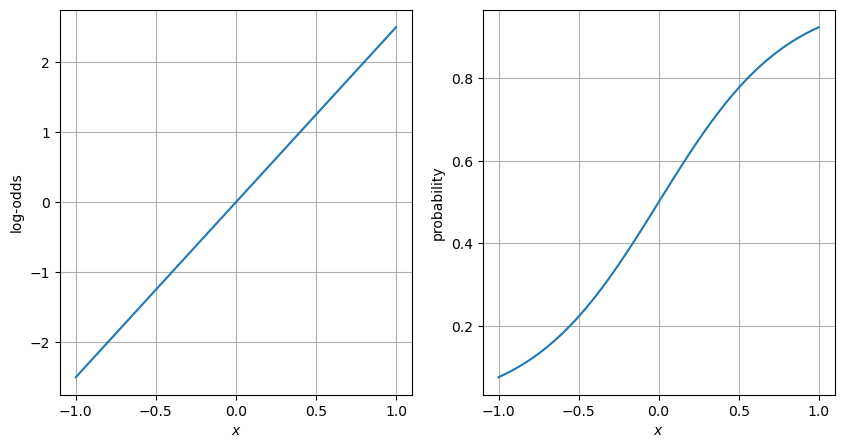

In [5]:
# Gráfico
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, log_odds)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("log-odds")
plt.subplot(1, 2, 2)
plt.plot(x, prob)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("probability")

La función

$$
\frac{\exp(\cdot)}{1 + \exp(\cdot)}
$$

se conoce comúnmente como función logística. También, en este contexto la llamaremos **logit-inversa**, dado que invierte la transformación logit. 

Notemos que lo que hace esta función es comprimir el espacio no acotado en el espacio de probabilidad. Esto afecta la interpretación de los parámetros $\alpha$ y $\beta$, ya que el cambio unitario en el predictor, no produce un cambio constante en la media de la variable de resultado. Por el contrario, un cambio unitario en $x_i$ puede producir un cambio más grande o más pequeño en la probabilidad $p_i$, dependiendo de que tan lejos de cero estén las posibilidades logarítmicas.

#### Enlace log

El segundo enlace común es el **enlace log**. Esta función mapea un parámetro definido sobre los reales positivos, sobre todos los reales. Por ejemplo, si queremos modelar la desviación estándar $\sigma$ de una distribución Gaussiana de manera que sea función de un predictor $x$, el parámtro $\sigma$ debe de ser positivo, dado que la desviación estándar no puede ser negativa ni cero. El modelo se vería como:

$$
\begin{array}{ccc}
y_i & \sim & \text{Normal}(\mu, \sigma_i) \\
\log (\sigma_i) & = & \alpha + \beta x_i
\end{array}
$$

Contrario a los modelos que hemos estado estudiando, acá $\mu$ es constante, pero la desviación estándar escala con el valor de $x_i$. Un enlace log es convencional además de útil en esta situación, dad o que previene que $sigma$ tome valores negativos.

Efectivamente, lo que hace el enlace log es suponer que el valor del parámetro es la exponenciación del modelo lineal:

$$
\log \sigma_i = \alpha + \beta x_i \Leftrightarrow \sigma_i = \exp(\alpha + \beta x_i)
$$

In [6]:
# Predictor
x = np.linspace(-1, 1, 1000)
# Modelo lineal
a, b = 0, 2.5
log_sigma = a + b * x
# sigma
sigma = np.exp(log_sigma)

Text(0, 0.5, 'sigma')

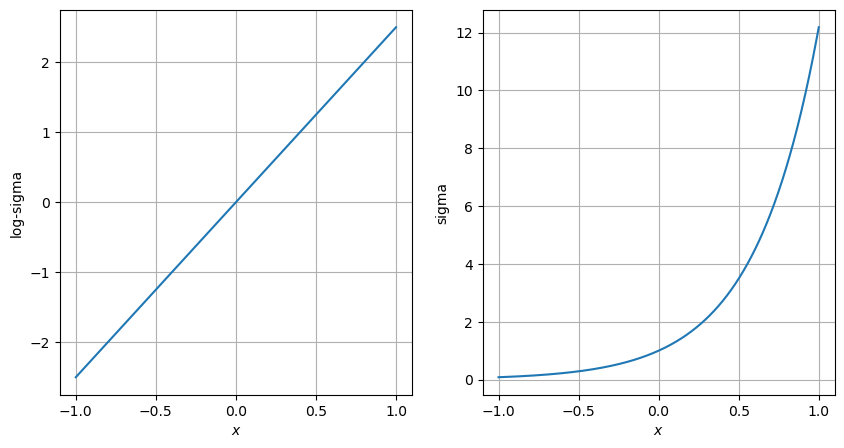

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, log_sigma)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("log-sigma")
plt.subplot(1, 2, 2)
plt.plot(x, sigma)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("sigma")

Como ya han de conocer, esta función implica un escalamiento exponencial del resultado del modelo lineal. Una manera de entender esto es recordando que los logaritmos son órdenes de maginud. Un incremento de uno en la escala logarítmica, significa un incremento de una orden de magnitud (multiplicar por $e$) en la escala transformada.

Aunque el enlace log resuelve el problema de restringir el parámetro a ser positivo, también puede crear el problema de explosión exponencial, si se le pide al modelo predecir fuera del rango donde fue entrenado. Así como un modelo lineal es lineal en cierta región, un modelo exponencial también lo es en cierta región.

## 2. Bias de omisión de variables

En el tema 9 vimos los problemas que nos trae la omisión de variables en un modelo lineal. En GLMs el problema persiste, y puede ser incluso peor, por los efectos de compresión de los enlaces.

Imaginemos que dos variables $X$ y $Z$ influencian de forma independiente un resultado binario $Y$. Si alguno, $X$ o $Z$, son suficientemente grandes, entonces $Y=1$. Ambas variables son causas suficiente de $Y$. Si no medimos $Z$ sino solamente $X$, estaremos sistemáticamente subestimando el efecto causal de $X$.

¿Por qué? Bueno, $Z$ es suficiente para que $Y=1$, por lo que habrá casos donde $X$ sea pequeño y aún así $Y=1$, lo que significaría que $X$ no influencia $Y$ muy fuertemente, pero esto solo por omitir $Z$.

# Anuncios parroquiales

## 1. Quiz de GLMs el jueves 9 de noviembre.